In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 106.6 MB/s eta 0:00:00


In [2]:

# --- Required Imports ---
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

# Helper to display plots in environments like Jupyter
from IPython.display import display



In [3]:

# Initialize a global simulator for all tasks
sim = AerSimulator()

# ==============================================================================
# ## TASK 1: Predict and Verify Statevectors after Hadamard Gate
#
# **Objective:** Predict the statevector after applying the Hadamard (H) gate
# to the states |0>, |1>, |+>, and |->, and then verify these predictions.
# ==============================================================================

print("\n" + "="*70)
print("### START TASK 1: Statevector Prediction and Verification ###")
print("="*70)

# --- Predictions ---
# H|0> = |+>, Predicted Statevector: [1/√2,  1/√2] ≈ [0.707,  0.707]
# H|1> = |->, Predicted Statevector: [1/√2, -1/√2] ≈ [0.707, -0.707]
# H|+> = |0>, Predicted Statevector: [1, 0]
# H|-> = |1>, Predicted Statevector: [0, 1]

def verify_statevector(initial_state, label):
    """A helper function to apply H and print the resulting statevector."""
    qc = QuantumCircuit(1)
    qc.initialize(initial_state, 0)
    qc.h(0)
    final_state = Statevector.from_instruction(qc)
    print(f"OUTPUT 1.{label}: H on {label}")
    print(f"  - Initial Statevector: {np.round(initial_state.data, 5)}")
    print(f"  - Final Statevector:   {np.round(final_state.data, 5)} (Verification Complete)\n")

# Verify each prediction
verify_statevector(Statevector.from_label('0'), "|0>")
verify_statevector(Statevector.from_label('1'), "|1>")
verify_statevector(Statevector.from_label('+'), "|+>")
verify_statevector(Statevector.from_label('-'), "|->")

print("### END TASK 1 ###")
print("="*70 + "\n")




### START TASK 1: Statevector Prediction and Verification ###
OUTPUT 1.|0>: H on |0>
  - Initial Statevector: [1.+0.j 0.+0.j]
  - Final Statevector:   [0.70711+0.j 0.70711+0.j] (Verification Complete)

OUTPUT 1.|1>: H on |1>
  - Initial Statevector: [0.+0.j 1.+0.j]
  - Final Statevector:   [ 0.70711+0.j -0.70711+0.j] (Verification Complete)

OUTPUT 1.|+>: H on |+>
  - Initial Statevector: [0.70711+0.j 0.70711+0.j]
  - Final Statevector:   [1.+0.j 0.+0.j] (Verification Complete)

OUTPUT 1.|->: H on |->
  - Initial Statevector: [ 0.70711+0.j -0.70711+0.j]
  - Final Statevector:   [0.+0.j 1.+0.j] (Verification Complete)

### END TASK 1 ###



### START TASK 2: 3-Qubit H⊗H⊗H System ###
OUTPUT 2.1: Simulating the circuit...
OUTPUT 2.2: Measurement Probability Histogram


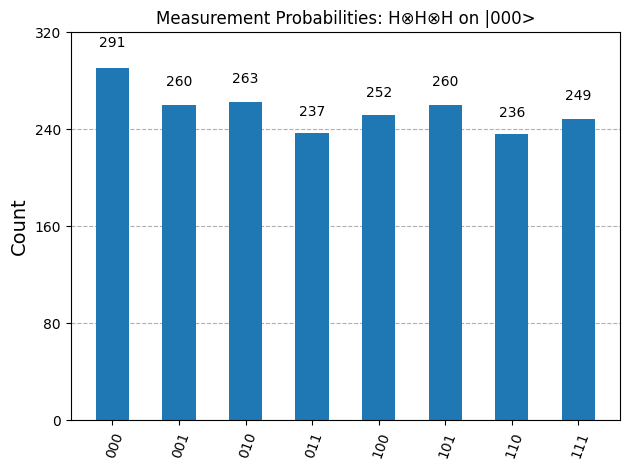


OUTPUT 2.3: Analysis
  - The circuit creates the state (1/√8) * Σ|x> for all x in {0,1}³.
  - The histogram confirms this, showing a nearly uniform probability distribution.
  - Each of the 8 possible outcomes ('000' through '111') has an ~12.5% chance of being measured.

### END TASK 2 ###



In [4]:
# ==============================================================================
# ## TASK 2: 3-Qubit System in Equal Superposition (H⊗H⊗H)
#
# **Objective:** Create a 3-qubit system, apply a Hadamard gate to each qubit
# to generate an equal superposition of all basis states, and analyze the
# measurement probabilities.
# ==============================================================================

print("="*70)
print("### START TASK 2: 3-Qubit H⊗H⊗H System ###")
print("="*70)

# Create the circuit
qc_h3 = QuantumCircuit(3, 3)
qc_h3.h([0, 1, 2])  # Apply H to all three qubits
qc_h3.measure([0, 1, 2], [0, 1, 2])

# Simulate and get measurement counts
print("OUTPUT 2.1: Simulating the circuit...")
qc_h3_t = transpile(qc_h3, sim)
result_h3 = sim.run(qc_h3_t, shots=2048).result() # Using more shots for better distribution
counts_h3 = result_h3.get_counts()

# Display the histogram
print("OUTPUT 2.2: Measurement Probability Histogram")
display(plot_histogram(counts_h3, title="Measurement Probabilities: H⊗H⊗H on |000>"))

# Analysis
print("\nOUTPUT 2.3: Analysis")
print("  - The circuit creates the state (1/√8) * Σ|x> for all x in {0,1}³.")
print("  - The histogram confirms this, showing a nearly uniform probability distribution.")
print("  - Each of the 8 possible outcomes ('000' through '111') has an ~12.5% chance of being measured.")

print("\n### END TASK 2 ###")
print("="*70 + "\n")




### START TASK 3: 3-Qubit GHZ State ###
OUTPUT 3.1: Simulating the circuit...
OUTPUT 3.2: Measurement Correlation Histogram


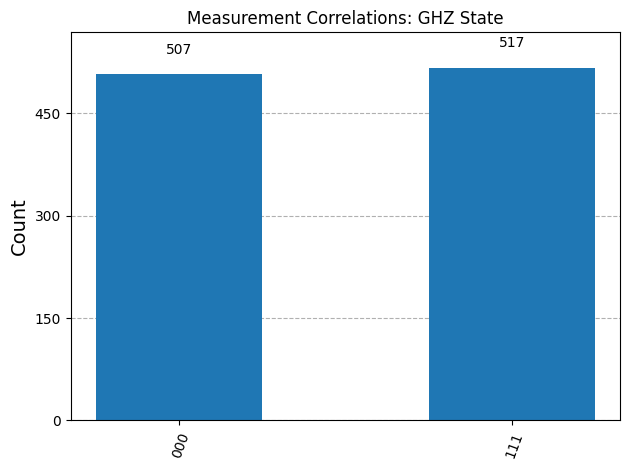


OUTPUT 3.3: Analysis
  - The circuit creates an entangled GHZ state.
  - The histogram shows that the only measurement outcomes are '000' and '111'.
  - This demonstrates perfect correlation: the state of all three qubits is identical upon measurement.

### END TASK 3 ###



In [5]:

# ==============================================================================
# ## TASK 3: 3-Qubit Entanglement (GHZ State)
#
# **Objective:** Apply H, CX, and CX gates on 3 qubits to create a GHZ
# (Greenberger–Horne–Zeilinger) state and analyze the measurement correlations.
# ==============================================================================

print("="*70)
print("### START TASK 3: 3-Qubit GHZ State ###")
print("="*70)

# Create the circuit for a GHZ state: (|000> + |111>)/√2
qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1) # Control-qubit 0, Target-qubit 1
qc_ghz.cx(0, 2) # Control-qubit 0, Target-qubit 2
qc_ghz.measure([0, 1, 2], [0, 1, 2])

# Simulate and get measurement counts
print("OUTPUT 3.1: Simulating the circuit...")
qc_ghz_t = transpile(qc_ghz, sim)
result_ghz = sim.run(qc_ghz_t, shots=1024).result()
counts_ghz = result_ghz.get_counts()

# Display the histogram
print("OUTPUT 3.2: Measurement Correlation Histogram")
display(plot_histogram(counts_ghz, title="Measurement Correlations: GHZ State"))

# Analysis
print("\nOUTPUT 3.3: Analysis")
print("  - The circuit creates an entangled GHZ state.")
print("  - The histogram shows that the only measurement outcomes are '000' and '111'.")
print("  - This demonstrates perfect correlation: the state of all three qubits is identical upon measurement.")

print("\n### END TASK 3 ###")
print("="*70 + "\n")



### START TASK 4: Verifying H*H = I ###
OUTPUT 4.1: Statevector Verification
  - The statevector after applying H twice on |1> is: [0.+0.j 1.+0.j]
  - This is the statevector for |1>, confirming the state was restored.

OUTPUT 4.2: Measurement Result


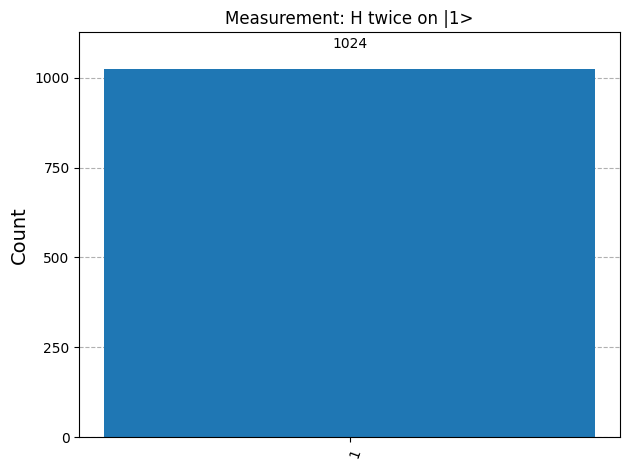

  - The measurement result is '1' with 100% probability, as expected.

### END TASK 4 ###



In [6]:

# ==============================================================================
# ## TASK 4: Verify the Inverse Property of the Hadamard Gate
#
# **Objective:** Show that the Hadamard gate is its own inverse (H * H = I)
# by applying it twice to the |1> state and verifying the qubit returns to |1>.
# ==============================================================================

print("="*70)
print("### START TASK 4: Verifying H*H = I ###")
print("="*70)

# Create the circuit
qc_h2 = QuantumCircuit(1, 1)
qc_h2.x(0) # Start in state |1>
qc_h2.barrier()
qc_h2.h(0) # First Hadamard
qc_h2.h(0) # Second Hadamard

# Verify the statevector before measurement
final_state_h2 = Statevector.from_instruction(qc_h2)
print("OUTPUT 4.1: Statevector Verification")
print(f"  - The statevector after applying H twice on |1> is: {np.round(final_state_h2.data, 5)}")
print("  - This is the statevector for |1>, confirming the state was restored.")

# Measure the final state
qc_h2.measure(0, 0)
qc_h2_t = transpile(qc_h2, sim)
result_h2 = sim.run(qc_h2_t, shots=1024).result()
counts_h2 = result_h2.get_counts()

# Display the histogram
print("\nOUTPUT 4.2: Measurement Result")
display(plot_histogram(counts_h2, title="Measurement: H twice on |1>"))
print("  - The measurement result is '1' with 100% probability, as expected.")


print("\n### END TASK 4 ###")
print("="*70 + "\n")



### START TASK 5: Bloch Sphere Visualizations ###
OUTPUT 5.1: Generating Bloch sphere plots to show rotations.
  - H rotates states on the Z-axis (|0>, |1>) to the X-axis (|+>, |->).
  - It also rotates states on the X-axis back to the Z-axis.


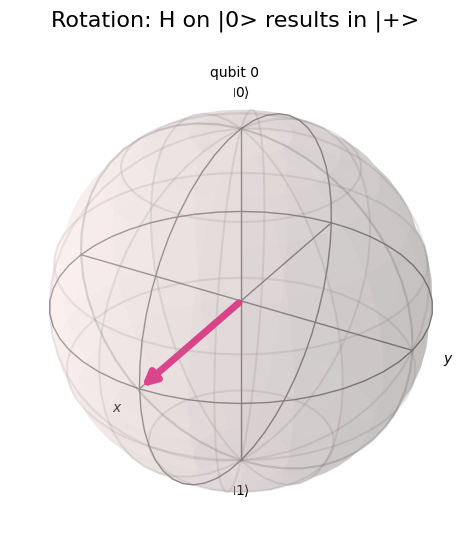

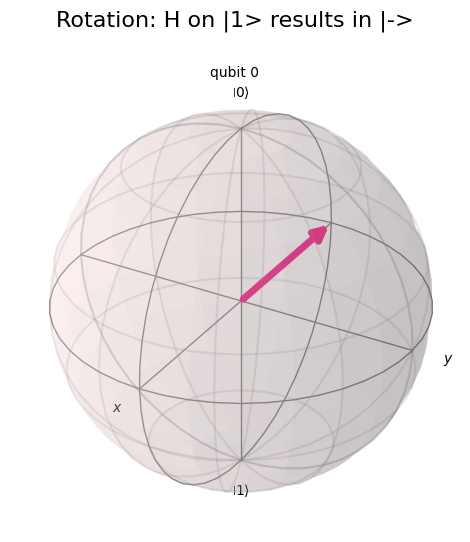


### END TASK 5 ###


In [7]:

# ==============================================================================
# ## TASK 5: Visualize Qubit Rotations on the Bloch Sphere
#
# **Objective:** Use Bloch sphere plots to visualize the geometric effect of the
# Hadamard gate, showing it as a rotation.
# ==============================================================================

print("="*70)
print("### START TASK 5: Bloch Sphere Visualizations ###")
print("="*70)

print("OUTPUT 5.1: Generating Bloch sphere plots to show rotations.")
print("  - H rotates states on the Z-axis (|0>, |1>) to the X-axis (|+>, |->).")
print("  - It also rotates states on the X-axis back to the Z-axis.")

# H on |0> -> |+>
qc_vis_0 = QuantumCircuit(1)
qc_vis_0.h(0)
state_vis_0 = Statevector.from_instruction(qc_vis_0)
display(plot_bloch_multivector(state_vis_0, title="Rotation: H on |0> results in |+>"))

# H on |1> -> |->
qc_vis_1 = QuantumCircuit(1)
qc_vis_1.x(0)
qc_vis_1.h(0)
state_vis_1 = Statevector.from_instruction(qc_vis_1)
display(plot_bloch_multivector(state_vis_1, title="Rotation: H on |1> results in |->"))

print("\n### END TASK 5 ###")
print("="*70)